# Projeto 3 - Regressão Linear Múltipla 

### Gabriel Noal & William Palmieri

<p> Regressão Múltipla é uma técnica estatística utilizada na construção de modelos que descrevem as relações que algumas variáveis têm com outra. </p>
<p> A análise é feita através da relação apresentada por uma variável principal, denominada "Dependente", e as variáveis "Explicativas". </p>

In [137]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np
import math

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

<p> Nossa análise será em torno do Índice de Percepcção de Corrupção (IPC).  </p>
<p> A seguir, temos a tabela retirada do site: https://www.gapminder.org/data/. </p>

#### Dados do IPC

In [138]:
notas1 = pd.read_excel("indicator ti cpi 2009.xlsx",index_col = 0)
notas1.head()

,CPI
Países,
New Zealand,9.3
Denmark,9.3
Sweden,9.2
Singapore,9.3
Switzerland,8.7


<p> Levaremos em conta em nossa análise como variáveis explicativas os parâmetros "IDH" e "Mortalidade Infantil". Ambos retirados do site: https://www.gapminder.org/data/. </p>

#### Dados do IDH

In [139]:
notas2 = pd.read_excel("Indicator_HDI.xlsx",index_col = 0)

notas2.head()

,IDH
Países,
Abkhazia,NaN
Afghanistan,0.387
Akrotiri and Dhekelia,NaN
Albania,0.734
Algeria,0.691


#### Dados da Mortalidade Infantil

In [140]:
notas3 = pd.read_excel("indicator gapminder infant_mortality.xlsx",index_col = 0)
notas3.head()

,Mortalidade_Infantil
País,
Abkhazia,NaN
Afghanistan,76.8
Akrotiri and Dhekelia,NaN
Albania,15.4
Algeria,24.3


#### Tabela com todos os dados

In [141]:
#Juntando os dados
dados = notas1.join(notas2,how ="outer")
dados = dados.join(notas3,how="outer")

#Retirando os "NaNs"
dados=dados[~np.isnan(dados.CPI)]
dados=dados[~np.isnan(dados.IDH)]
dados=dados[~np.isnan(dados.Mortalidade_Infantil)]
dados.head()

,CPI,IDH,Mortalidade_Infantil
Afghanistan,1.4,0.387,76.8
Albania,3.3,0.734,15.4
Algeria,2.9,0.691,24.3
Angola,1.9,0.481,112.2
Argentina,2.9,0.788,13.4


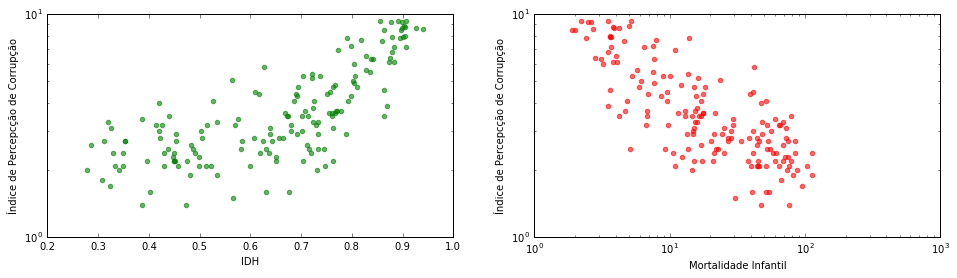

In [142]:
f, ax = plt.subplots(1,2,figsize=(16,4))
ax[0].scatter(dados.IDH, dados.CPI, alpha=0.6, color = "green")  # Plot the raw data
ax[0].set_xlabel("IDH")
ax[0].set_ylabel("Índice de Percepcção de Corrupção")
ax[0].set_xlim(0.2, 1)
ax[0].set_yscale("log")

ax[1].scatter(dados.Mortalidade_Infantil, dados.CPI, alpha=0.6, color = "red")  # Plot the raw data
ax[1].set_xlabel("Mortalidade Infantil")
ax[1].set_ylabel("Índice de Percepcção de Corrupção")
ax[1].set_yscale("log")
ax[1].set_xscale("log")